In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [49]:
df = pd.read_csv("G:/My Drive/adult.data.csv")

In [50]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [53]:
df.dtypes=='int64'

age                True
workclass         False
fnlwgt             True
education         False
education-num      True
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain       True
capital-loss       True
hours-per-week     True
native-country    False
salary            False
dtype: bool

In [54]:
df[df.dtypes[df.dtypes=='int64'].index]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [55]:
df.dtypes=='object'

age               False
workclass          True
fnlwgt            False
education          True
education-num     False
marital-status     True
occupation         True
relationship       True
race               True
sex                True
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary             True
dtype: bool

In [56]:
df[df.dtypes[df.dtypes=='object'].index]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [57]:
object_columns = df.columns[df.dtypes == 'object']
df[object_columns].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
salary            0
dtype: int64

In [58]:
int_columns = df.columns[df.dtypes == 'int64']
df[int_columns].isnull().sum()

age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [59]:
df.nunique().sort_values()

sex                   2
salary                2
race                  5
relationship          6
marital-status        7
workclass             9
occupation           15
education            16
education-num        16
native-country       42
age                  73
capital-loss         92
hours-per-week       94
capital-gain        119
fnlwgt            21648
dtype: int64

In [60]:
df['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [61]:
df['salary'].value_counts()

salary
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [62]:
df['race'].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [63]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [64]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [65]:
df['native-country'].value_counts()

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [66]:
df['workclass'].replace('?', np.nan, inplace=True)

In [67]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [68]:
df['occupation'].replace('?', np.nan, inplace=True)

In [69]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [70]:
df['native-country'].replace('?', np.nan, inplace=True)

In [71]:
df['native-country'].value_counts()

native-country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [72]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [73]:
mode_value = df['workclass'].mode()[0]
df['workclass'] = df['workclass'].fillna(mode_value)


In [74]:
mode_value = df['occupation'].mode()[0]
df['occupation'] = df['occupation'].fillna(mode_value)


In [75]:
mode_value = df['native-country'].mode()[0]
df['native-country'] = df['native-country'].fillna(mode_value)

In [76]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


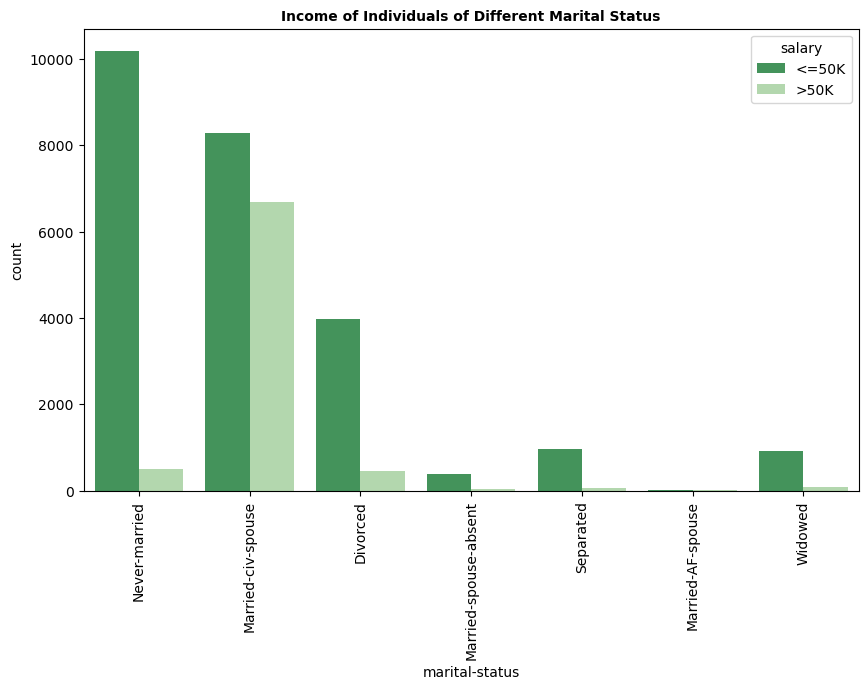

In [77]:
plt.figure(figsize=(10,6))
sns.countplot(x='marital-status', hue='salary', data=df, palette='Greens_r')
plt.title('Income of Individuals of Different Marital Status', fontsize=10, fontweight='bold')
plt.xticks(fontsize=10, rotation=90)
plt.show()

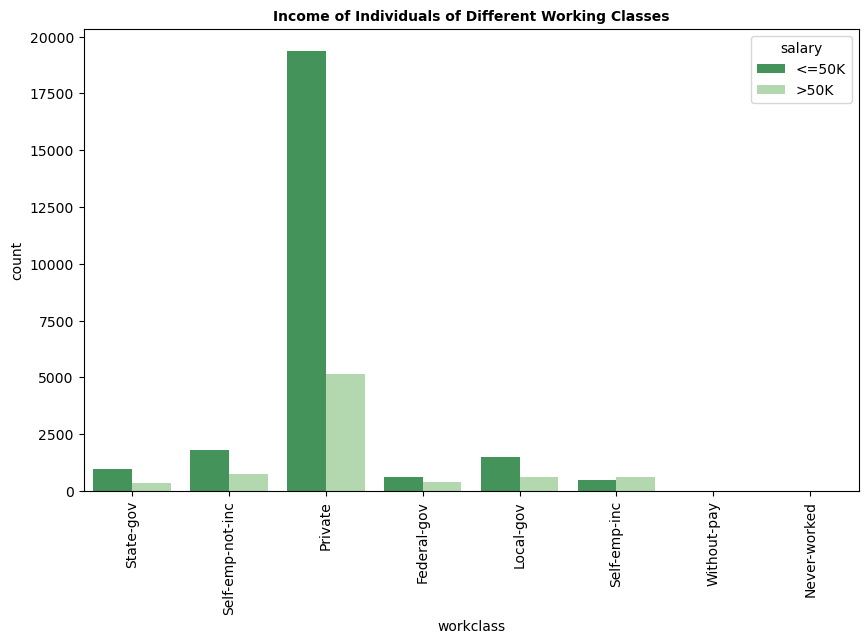

In [78]:
plt.figure(figsize=(10,6))
sns.countplot(x='workclass', hue='salary', data=df, palette='Greens_r')
plt.title('Income of Individuals of Different Working Classes', fontsize=10, fontweight='bold')
plt.xticks(fontsize=10, rotation=90)
plt.show()

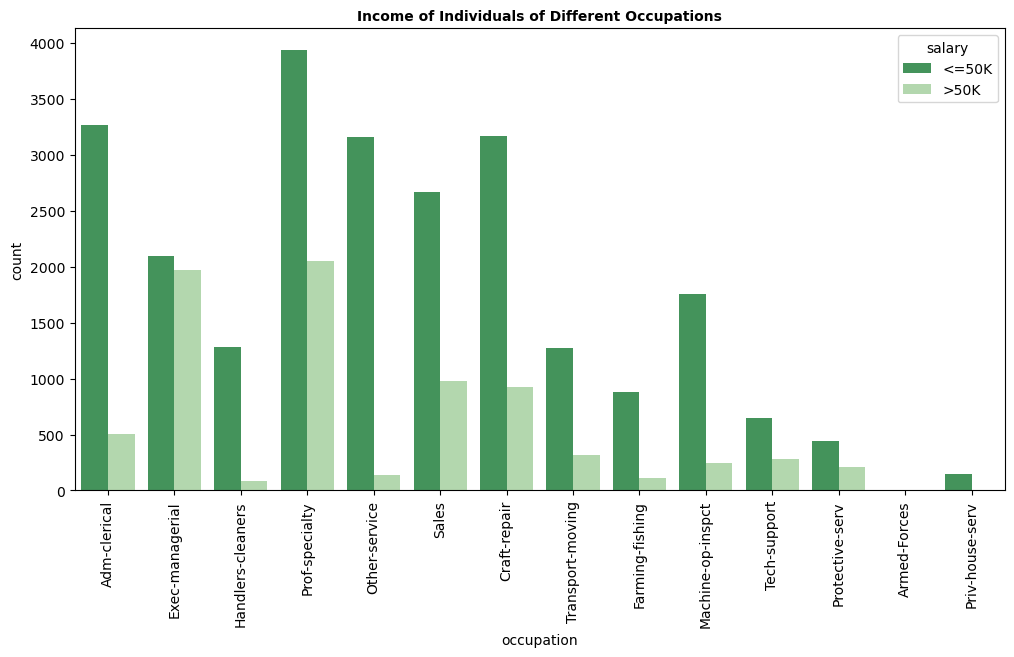

In [79]:
plt.figure(figsize=(12,6))
sns.countplot(x='occupation', hue='salary', data=df, palette='Greens_r')
plt.title('Income of Individuals of Different Occupations', fontsize=10, fontweight='bold')
plt.xticks(fontsize=10, rotation=90)
plt.show()

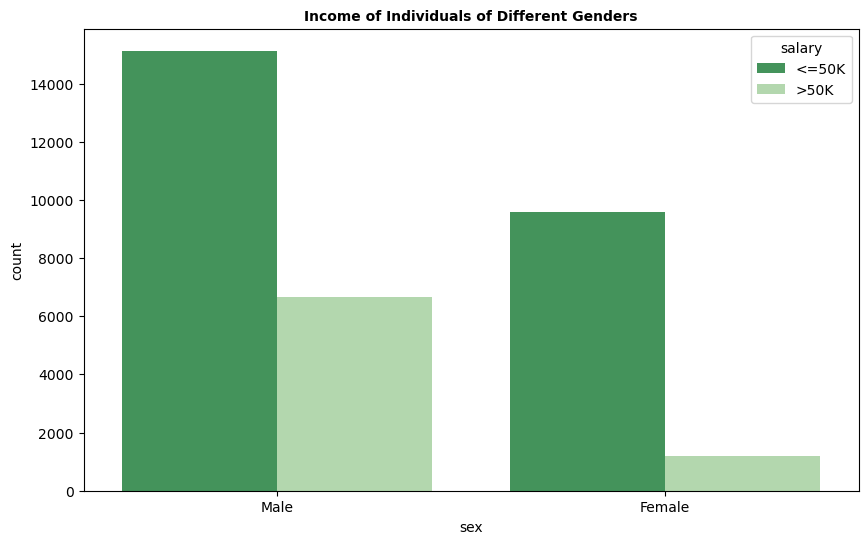

In [80]:
plt.figure(figsize=(10,6))
sns.countplot(x='sex', hue='salary', data=df, palette='Greens_r')
plt.title('Income of Individuals of Different Genders', fontsize=10, fontweight='bold')
plt.xticks(fontsize=10)
plt.show()

In [81]:
data = pd.get_dummies(data=df,columns=['workclass','education','marital-status','occupation',
                                       'relationship','race','sex','native-country'],dtype=int)

In [82]:
data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
data['salary']=df['salary'].map({'<=50K': 0, '>50K': 1})

In [84]:
data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [85]:
data.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076646,0.036527,0.077674,5.777454e-02,0.068756,0.234037,0.051227,0.060901,-0.019362,...,0.004242,0.008374,0.002583,0.000613,-0.013816,-0.006271,0.004843,0.017993,-1.505357e-02,0.000375
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-1.025171e-02,-0.018768,-0.009463,-0.007525,-0.002828,0.005031,...,-0.013152,0.007164,-0.003790,-0.012365,-0.001252,-0.001250,0.005273,-0.079790,-1.139827e-02,0.005501
education-num,0.036527,-0.043195,1.000000,0.122630,7.992296e-02,0.148123,0.335154,0.060518,0.097941,-0.015117,...,-0.044286,-0.041269,0.001264,0.016046,0.049472,0.007896,-0.017071,0.122965,-7.483035e-03,-0.001234
capital-gain,0.077674,0.000432,0.122630,1.000000,-3.161506e-02,0.078409,0.223329,-0.005768,-0.007007,-0.002140,...,-0.003879,-0.006103,-0.001680,0.005323,0.005735,-0.003432,-0.003526,0.011299,-2.564276e-03,-0.002193
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000e+00,0.054256,0.150526,0.010798,0.014668,-0.003177,...,-0.007308,-0.004718,-0.004160,0.010114,0.006637,-0.005095,0.008102,0.014458,-5.997599e-07,-0.004804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.006271,-0.001250,0.007896,-0.003432,-5.095482e-03,0.009537,-0.004078,-0.004099,-0.006164,-0.000345,...,-0.000793,-0.001394,-0.000452,-0.001167,-0.000932,1.000000,-0.000568,-0.076555,-1.067931e-03,-0.000521
native-country_Trinadad&Tobago,0.004843,0.005273,-0.017071,-0.003526,8.102329e-03,-0.006006,-0.007660,-0.004212,-0.001148,-0.000354,...,-0.000815,-0.001432,-0.000464,-0.001199,-0.000957,-0.000568,1.000000,-0.078654,-1.097212e-03,-0.000536
native-country_United-States,0.017993,-0.079790,0.122965,0.011299,1.445832e-02,0.008217,0.038942,0.016679,0.031002,0.004505,...,-0.109791,-0.192944,-0.062501,-0.161546,-0.128927,-0.076555,-0.078654,1.000000,-1.478096e-01,-0.072175
native-country_Vietnam,-0.015054,-0.011398,-0.007483,-0.002564,-5.997599e-07,-0.011379,-0.017649,0.000099,-0.003611,-0.000666,...,-0.001532,-0.002692,-0.000872,-0.002254,-0.001799,-0.001068,-0.001097,-0.147810,1.000000e+00,-0.001007


In [86]:
x = data.drop(['salary'],axis=1)
y = data['salary']

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [88]:
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [89]:
x_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.408756,0.080051,1.133702,-0.145715,-0.217998,0.779460,-0.174415,3.777362,-0.016395,-1.737208,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.310465,-0.048846,-0.02319
1,-0.188857,-0.981653,0.357049,-0.145715,4.457168,0.779460,-0.174415,-0.264735,-0.016395,0.575636,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.310465,-0.048846,-0.02319
2,1.423734,0.126197,-1.972910,-0.145715,-0.217998,-0.031510,-0.174415,-0.264735,-0.016395,-1.737208,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.310465,-0.048846,-0.02319
3,-1.288351,-0.090935,0.357049,-0.145715,-0.217998,0.455072,-0.174415,-0.264735,-0.016395,0.575636,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.310465,-0.048846,-0.02319
4,-0.848554,0.856334,-0.031277,-0.145715,-0.217998,-0.031510,-0.174415,-0.264735,-0.016395,0.575636,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.310465,-0.048846,-0.02319


In [90]:
x_test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.848554,-0.281107,-0.031277,-0.145715,-0.217998,-0.193705,-0.174415,-0.264735,-0.016395,0.575636,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.310465,-0.048846,-0.02319
1,0.470839,-1.322731,-0.419604,-0.145715,-0.217998,-0.031510,-0.174415,-0.264735,-0.016395,-1.737208,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.310465,-0.048846,-0.02319
2,-0.701954,-0.036597,1.133702,-0.145715,-0.217998,1.184946,-0.174415,-0.264735,-0.016395,0.575636,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.310465,-0.048846,-0.02319
3,-0.628655,0.002669,1.133702,-0.145715,-0.217998,-0.031510,-0.174415,-0.264735,-0.016395,0.575636,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.310465,-0.048846,-0.02319
4,-0.701954,-0.003926,-0.031277,0.158821,-0.217998,0.779460,-0.174415,-0.264735,-0.016395,-1.737208,...,-0.034519,-0.059535,-0.018591,-0.050782,-0.039217,-0.022346,-0.024792,0.310465,-0.048846,-0.02319


In [91]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [92]:
y_pred = model.predict(x_test)

In [93]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [94]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.973     0.226     0.367      4942
           1      0.287     0.980     0.444      1571

    accuracy                          0.408      6513
   macro avg      0.630     0.603     0.405      6513
weighted avg      0.808     0.408     0.385      6513

